Chapter 22
# 平面等高线 + 梯度
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import numpy as np
from sympy.functions import exp
# import os

# # 如果文件夹不存在，创建文件夹
# if not os.path.isdir("Figures"):
#     os.makedirs("Figures")

### 定义符号函数

In [2]:
# 定义符号变量
x1,x2 = sympy.symbols('x1 x2')

# 定义符号二元函数
f_x = x1*exp(-(x1**2 + x2**2))

# 将符号函数转换为Python函数
f_x_fcn = sympy.lambdify([x1,x2],f_x)

# 计算梯度
grad_f = [sympy.diff(f_x,var) for var in (x1,x2)]

# 将符号梯度转化为Python函数
grad_fcn = sympy.lambdify([x1,x2],grad_f)

In [3]:
f_x

x1*exp(-x1**2 - x2**2)

In [4]:
grad_f

[-2*x1**2*exp(-x1**2 - x2**2) + exp(-x1**2 - x2**2),
 -2*x1*x2*exp(-x1**2 - x2**2)]

### 产生数据

In [10]:
# 细腻颗粒度
x1_array = np.linspace(-2,2,401)
x2_array = np.linspace(-2,2,401)
xx1, xx2 = np.meshgrid(x1_array,x2_array)

# 粗糙颗粒度
x1_array_ = np.linspace(-2,2,21)
x2_array_ = np.linspace(-2,2,21)
xx1_, xx2_ = np.meshgrid(x1_array_,x2_array_)
V = grad_fcn(xx1_,xx2_)

ff_x = f_x_fcn(xx1,xx2)
ff_x_ = f_x_fcn(xx1_,xx2_)

### 平面向量场

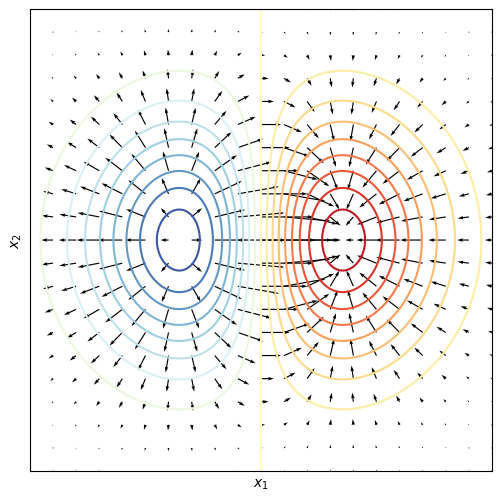

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
# 用颗粒度高的数据绘制等高线
ax.contour(xx1, xx2, ff_x, 20, cmap = 'RdYlBu_r')

# 用颗粒度低的数据绘制向量场
ax.quiver(xx1_, xx2_, V[0], V[1],
          width = 0.0025,
          color = 'k')

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.xlim(-2,2)
plt.ylim(-2,2)

ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.show()
# fig.savefig('Figures/平面向量场.svg', format='svg')

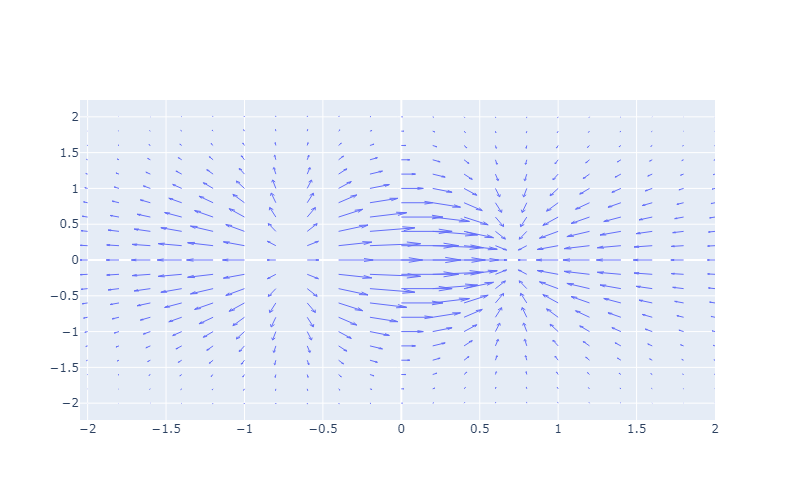

In [19]:
import plotly.figure_factory as ff

fig = ff.create_quiver(xx1_, xx2_, 
                       V[0], V[1],
                       scale=0.38,
                       arrow_scale=.28,
                       line_width=1)

fig.update_layout(autosize=False,
                  width=500, height=500)
fig.show()

In [7]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023